In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from intelligent_placer_lib import loading
from intelligent_placer_lib import intelligent_placer
from intelligent_placer_lib.preprocessing import get_paper_line
from intelligent_placer_lib.recognizing import get_polygon_contour, get_things_contours
import cv2
import pandas as pd


Зададим директорию, откуда возьмём тестовые данные и загрузим их

In [2]:
test_images_path = 'images/input/'
test_images = loading.load_images_from_folder(test_images_path)

Посмотрим, нормально ли загрузились изображения

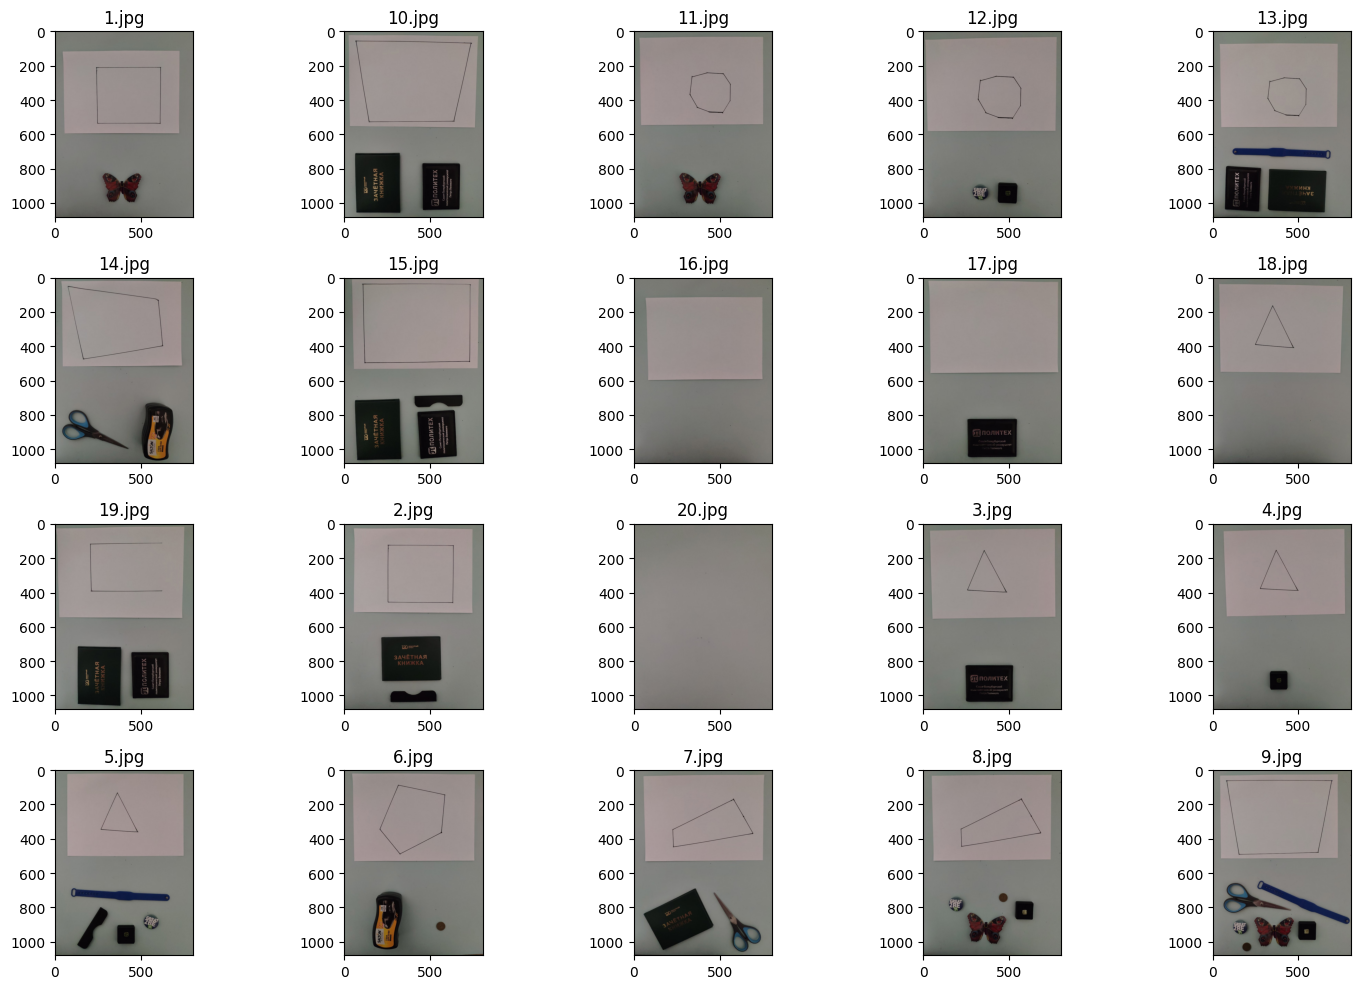

In [3]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
for i, (image, im_name) in enumerate(test_images):
    ax[i // 5, i % 5].set_title(im_name)
    ax[i // 5, i % 5].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
fig.tight_layout()


Как видим, всё хорошо(вроде бы?).
Делим изображение на две части, в одной из которых будут предметы, а в другой многоугольник

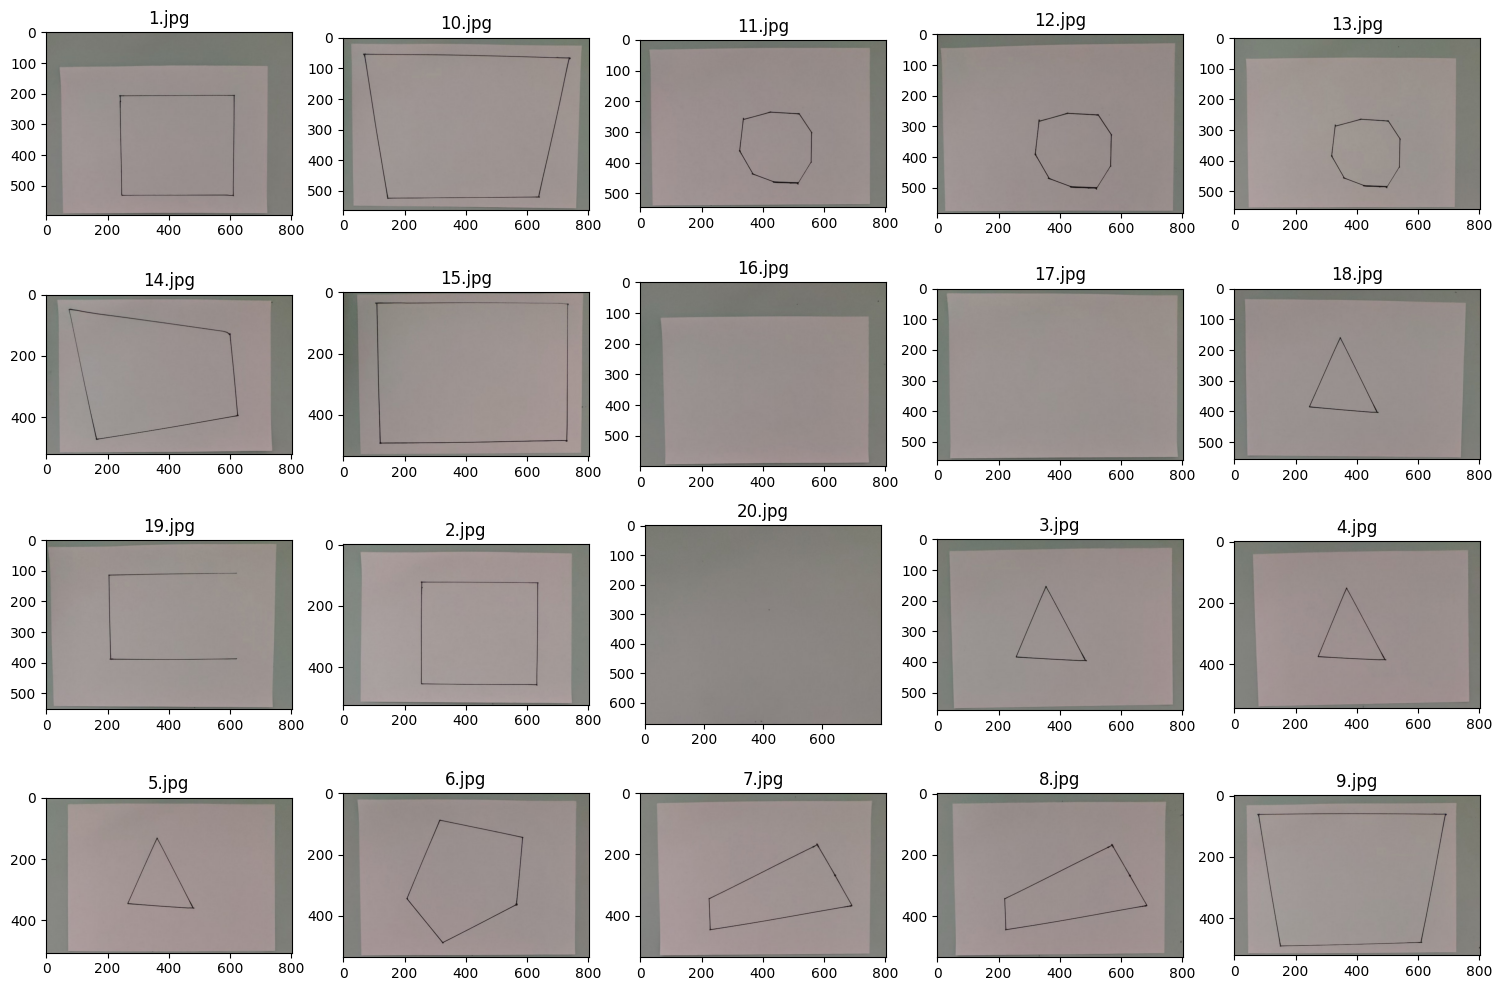

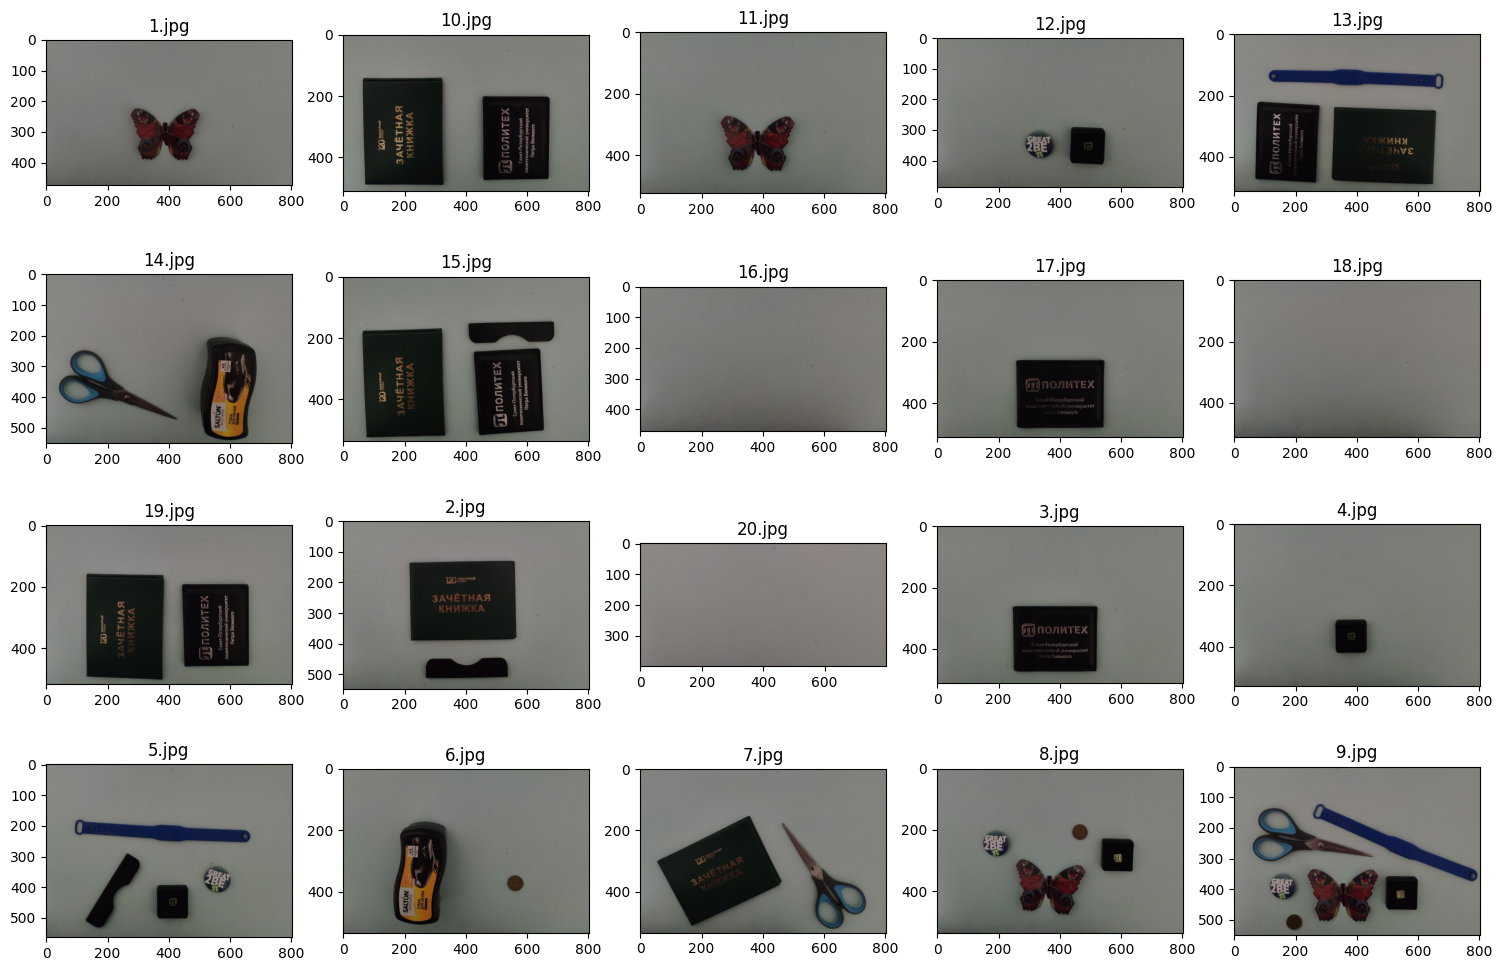

In [4]:
min_height = 5
min_width= 0 
fig1, ax1 = plt.subplots(4, 5, figsize=(15, 10))
fig2, ax2 = plt.subplots(4, 5, figsize=(15, 10))
for i, (image, im_name) in enumerate(test_images):
    dividing_line = get_paper_line(image)
    polygon_image = image[min_height:dividing_line, min_width:image.shape[1] - 5]
    things_image = image[dividing_line:image.shape[0] - 5, min_width:image.shape[1]- 5]

    ax1[i // 5, i % 5].set_title(im_name)
    ax1[i // 5, i % 5].imshow(cv2.cvtColor(polygon_image, cv2.COLOR_BGR2RGB))

    ax2[i // 5, i % 5].set_title(im_name)
    ax2[i // 5, i % 5].imshow(cv2.cvtColor(things_image, cv2.COLOR_BGR2RGB))
fig1.tight_layout()
fig2.tight_layout()

Следующий шаг в программе(на данный момент) - это предобработка и выделение контуров. Используются фильтры Кэнни, морфологические операции и другое, что можно увидеть в модулях 'preprocessing' и 'recognizing'. Вывод контуров показан ниже

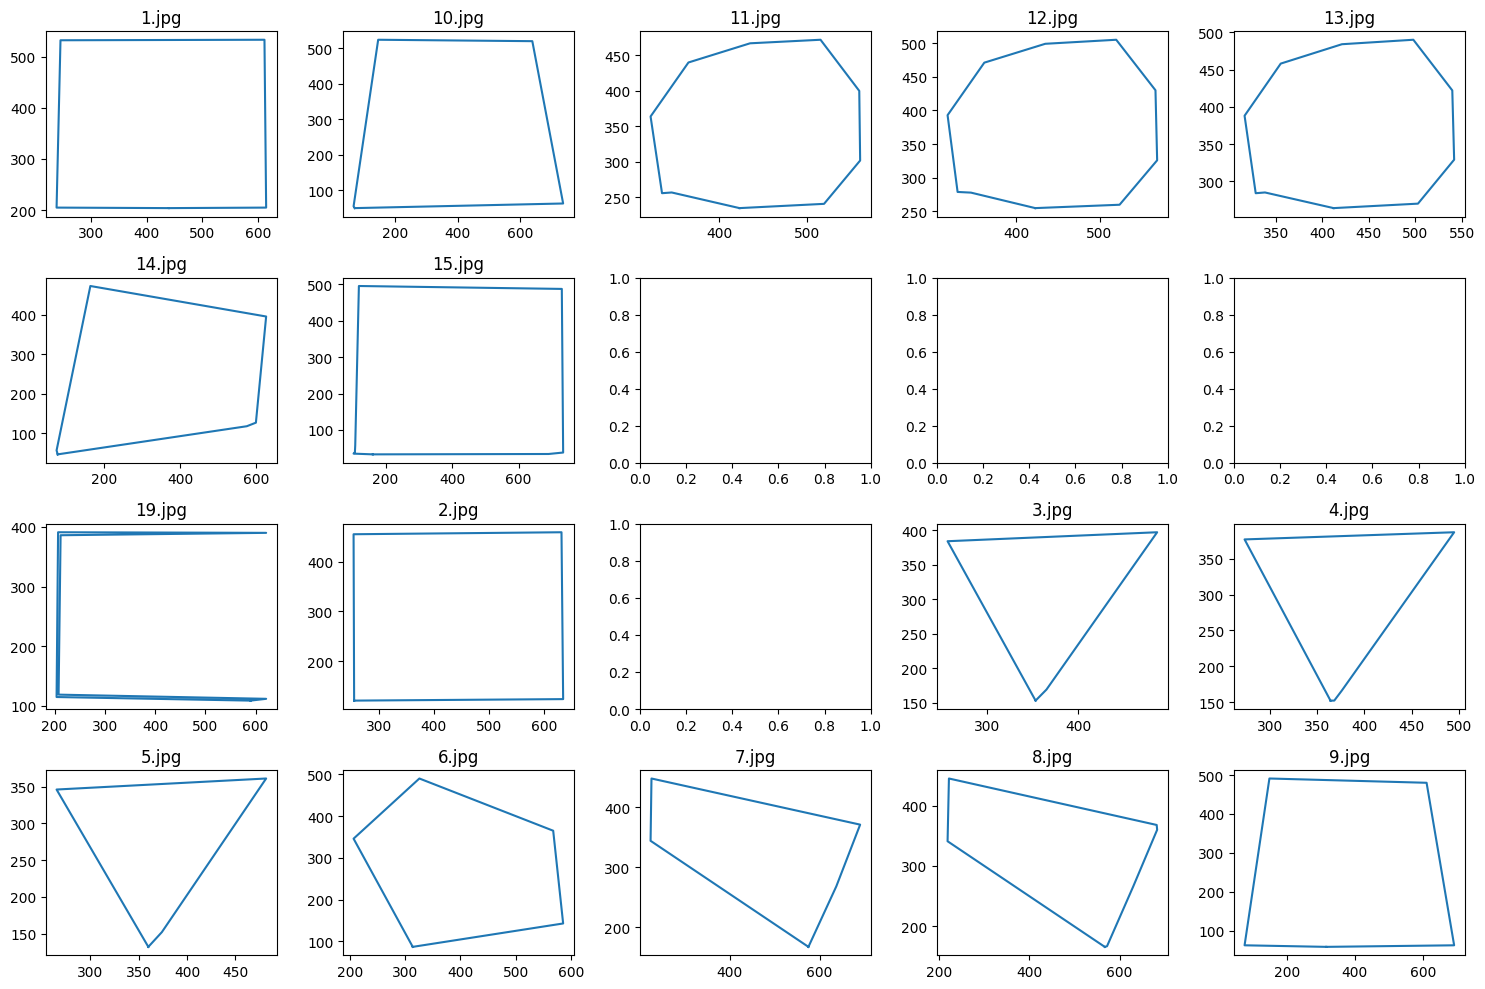

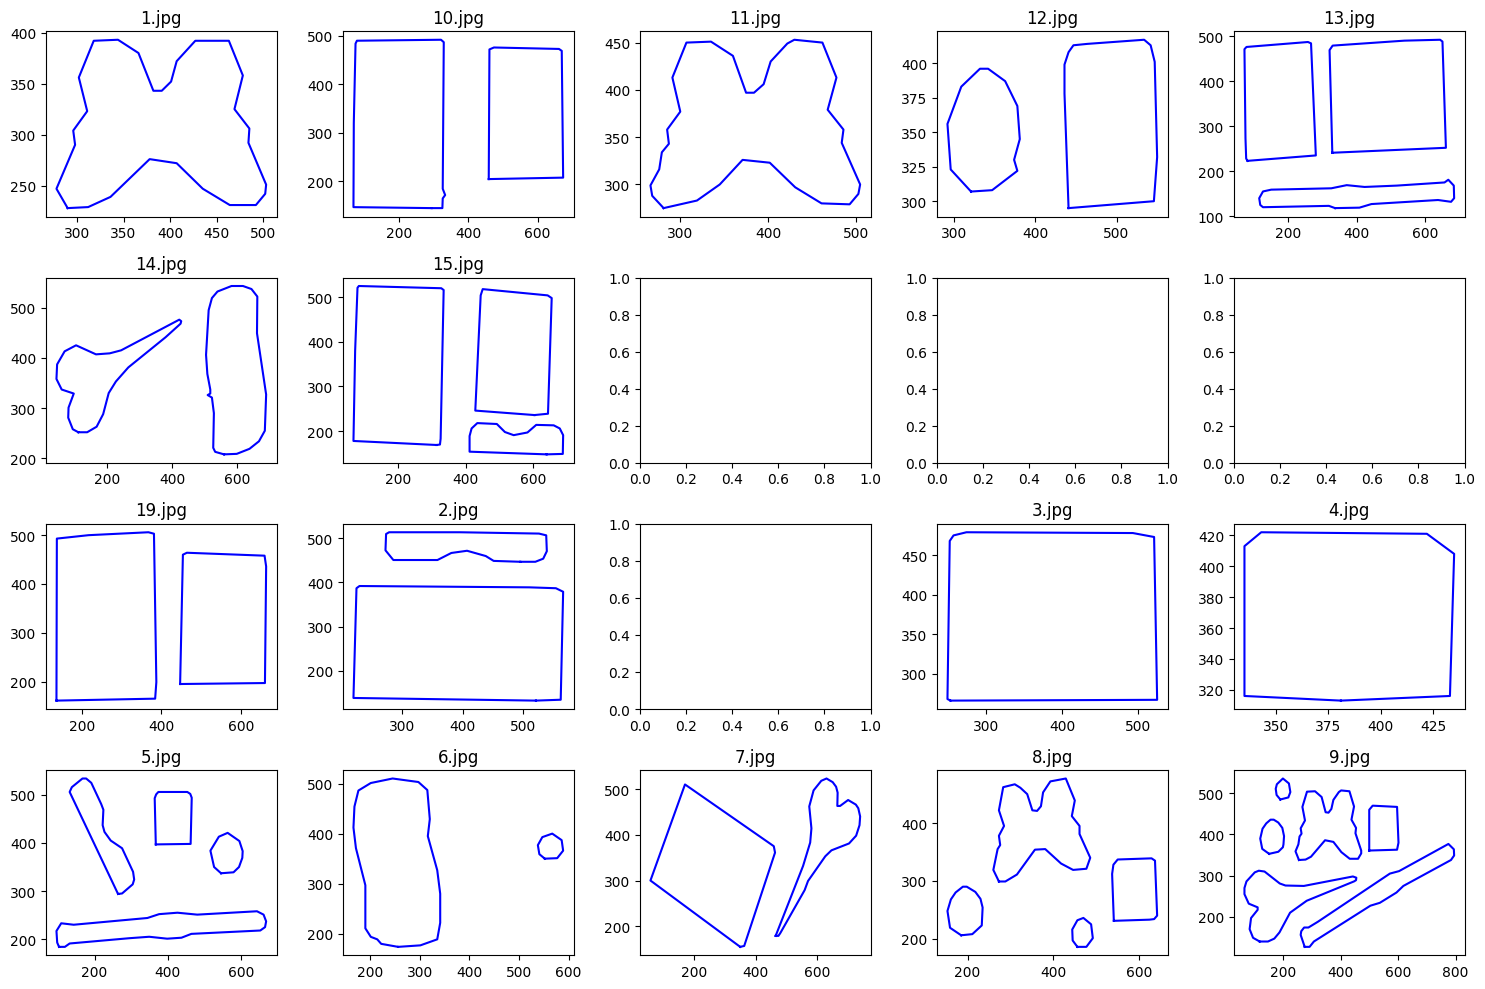

In [5]:
fig3, ax3 = plt.subplots(4, 5, figsize=(15, 10))
fig4, ax4 = plt.subplots(4, 5, figsize=(15, 10))
for i, (image, im_name) in enumerate(test_images):
    dividing_line = get_paper_line(image)
    polygon_image = image[min_height:dividing_line, min_width:image.shape[1] - 5]
    things_image = image[dividing_line:image.shape[0] - 5, min_width:image.shape[1]- 5]
    polygon_contour = get_polygon_contour(polygon_image)
    things_contours = get_things_contours(things_image)
    # Если вершины не нашлись, то пропускаем итерацию
    if polygon_contour.is_empty or len(things_contours) == 0:
        continue


    ax3[i // 5, i % 5].set_title(im_name)
    x,y = polygon_contour.exterior.coords.xy
    ax3[i // 5, i % 5].plot(x,y)

    ax4[i // 5, i % 5].set_title(im_name)
    for contour in things_contours:
        x, y = contour.exterior.coords.xy
        ax4[i // 5, i % 5].plot(x, y, color='blue')
fig3.tight_layout()
fig4.tight_layout()

Теперь, когда есть контуры предметов и многоугольника, можно попробовать что-нибудь 'предсказать'. Надпись под картиной относится к самой картинке(неожиданно). Если рисунка нет, а только надпись, то это значит, что изображение отсеклось на уровне "нет предметов/ многоугольника"

Я специально убрал проверку на сумму площадей, чтобы можно было увидеть и оценить, как работает алгоритм упаковки. Без неё результаты те же, только быстрее.

Единственный тест, который получился с ошибкой - это тот, который относится к картинке "8.jpg". Если смотреть именно на фотографию, то по ней алгоритм отработал вроде как нормально и уложил предметы. Однако в реальной жизни этого сделать не получилось. Судя по всему, проблема именно в том, что фотографии получаются с некоторым перспективным искажением(или же из-за некоторых упрощений предметов, типа simplify или предобработки, или у меня просто крыша поехала, потому что в реальной жизни нужно миллиметрами предметы двигать, и, тогда, может уберётся) и, возможно, как раз для этого и немного имеет смысл(но пока несильно) сделать соответствие предметов непосредственно из набора. Однако, и на тех фотографиях может быть искажение(ровно как может быть и искажение многоугольника), которое каким-то образом можно попытаться исправить, а можно просто ужесточить требование. В общем, на момент написания сие сочинения, правильность ответа "8.jpg" остаётся под вопросом

Запустим все вышеописанные шаги вместе(дополнительно подгрузим результаты, которые должны быть):

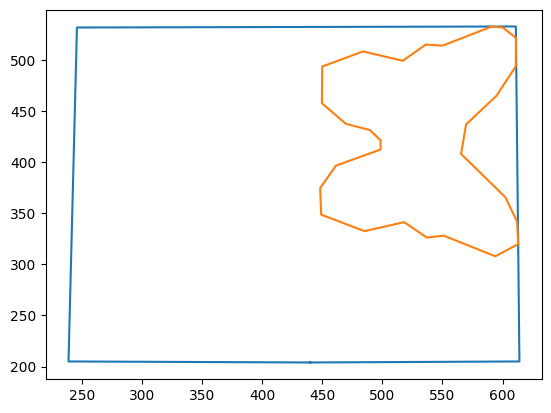

1.jpg: Результат = True, Ожидаемый результат = True


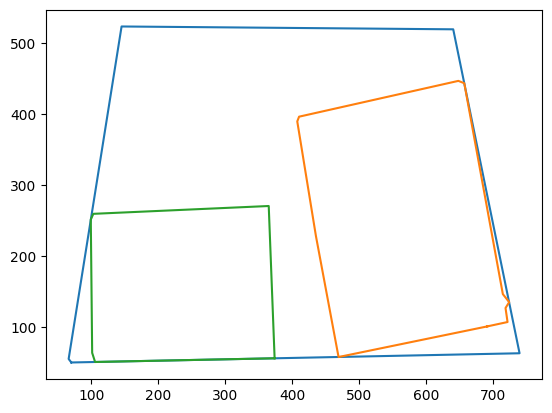

10.jpg: Результат = True, Ожидаемый результат = True


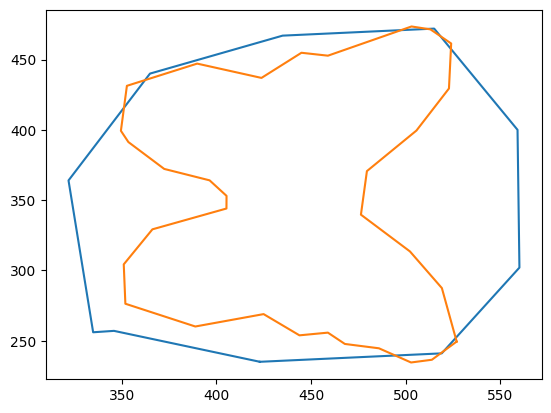

11.jpg: Результат = False, Ожидаемый результат = False


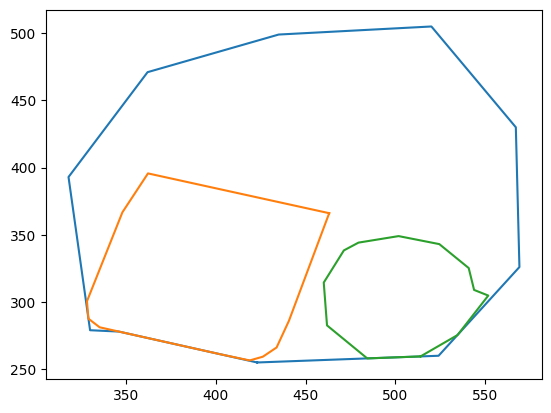

12.jpg: Результат = True, Ожидаемый результат = True


c:\Users\dmves\Documents\VSCodeProjects\Intelligent-Placer\venv\lib\site-packages\scipy\optimize\_differentialevolution.py:1458: RuntimeWarning: invalid value encountered in divide
  return (parameters - self.__scale_arg1) / self.__scale_arg2 + 0.5


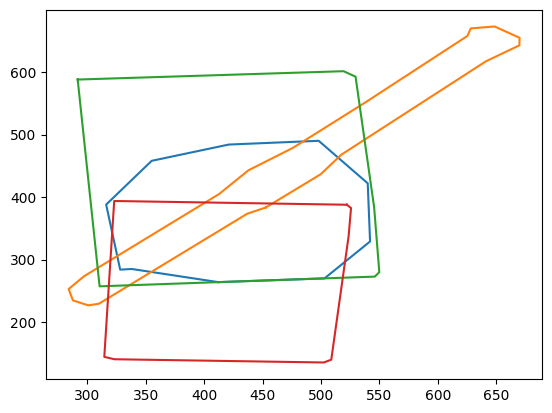

13.jpg: Результат = False, Ожидаемый результат = False


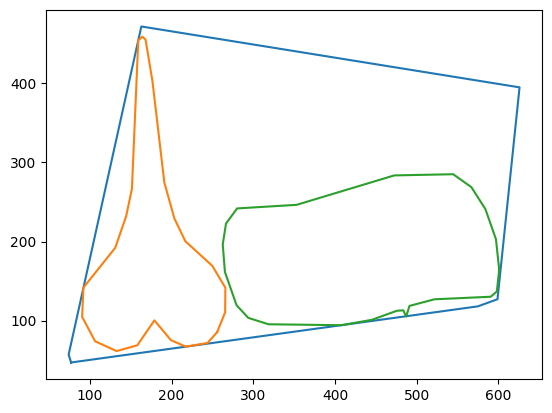

14.jpg: Результат = True, Ожидаемый результат = True


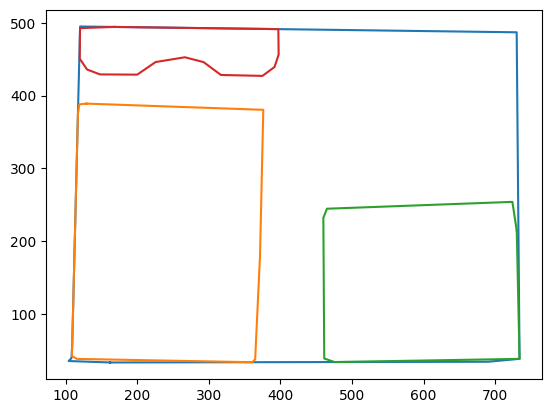

15.jpg: Результат = True, Ожидаемый результат = True
16.jpg: Результат = False, Ожидаемый результат = False
17.jpg: Результат = False, Ожидаемый результат = False
18.jpg: Результат = False, Ожидаемый результат = False


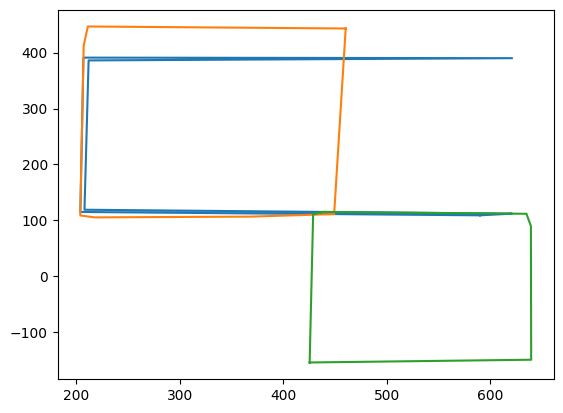

19.jpg: Результат = False, Ожидаемый результат = False


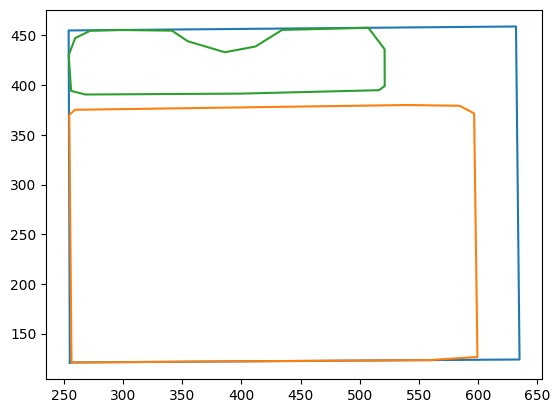

2.jpg: Результат = True, Ожидаемый результат = True
20.jpg: Результат = False, Ожидаемый результат = False


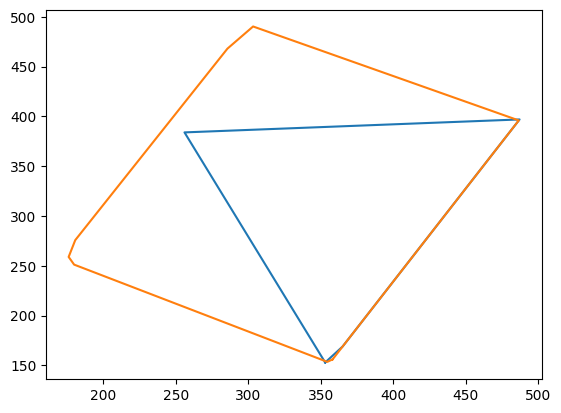

3.jpg: Результат = False, Ожидаемый результат = False


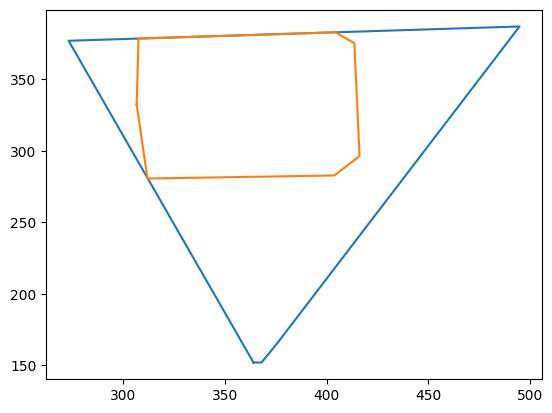

4.jpg: Результат = True, Ожидаемый результат = True


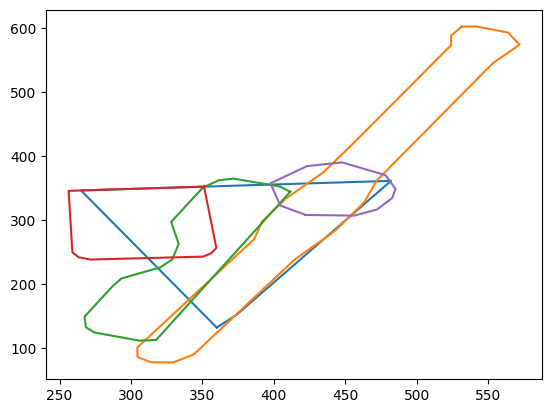

5.jpg: Результат = False, Ожидаемый результат = False


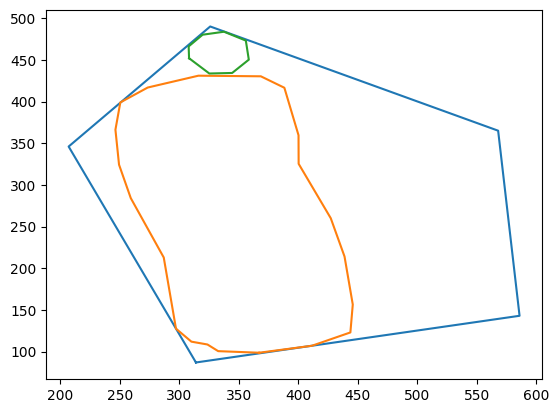

6.jpg: Результат = True, Ожидаемый результат = True


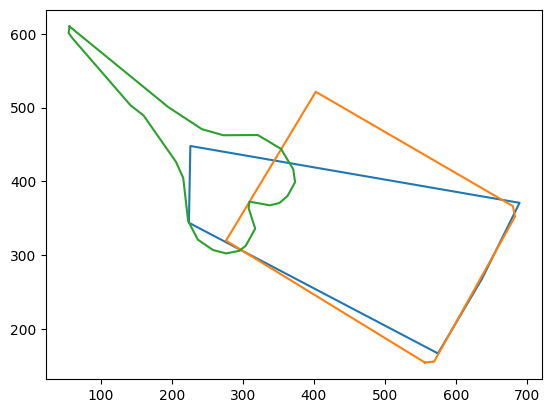

7.jpg: Результат = False, Ожидаемый результат = False


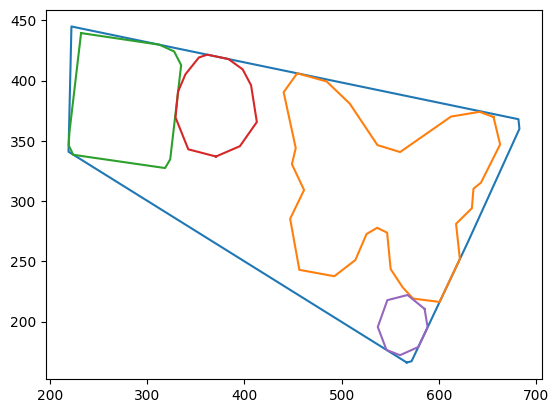

8.jpg: Результат = True, Ожидаемый результат = False


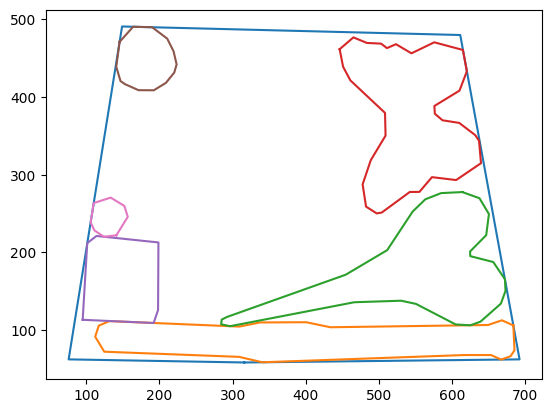

9.jpg: Результат = True, Ожидаемый результат = True
Правильных: 19
Всего тестов: 20
Процент правильных ответов: 95.0%


In [3]:
df = pd.read_csv('images/input/ExpectedResultsWithDescr.csv', delimiter=',', encoding="windows-1251")
correct_cnt = 0
for i, (image, im_name) in enumerate(test_images):
    expected_result = df.query(f'Name == \'{im_name}\'').iloc[0]['ExpectedResult']
    result = intelligent_placer.check_image(test_images_path + im_name)
    correct_cnt += (result == expected_result)
    print(f'{im_name}: Результат = {result}, Ожидаемый результат = {bool(expected_result)}')
print(f'Правильных: {correct_cnt}\nВсего тестов: {len(test_images)}\nПроцент правильных ответов: {correct_cnt / len(test_images) * 100}%')